# GTHA housing market database
# OSEMN methodology Step 1: Obtain
# Obtain dataset of parcels

---

This notebook describes _Step 1: Obtain_ of OSEMN methodology, the process of obtaining the dataset of parcels, based on the Land Use datasets.

---

For description of OSEMN methodology, see `methodology/0.osemn/osemn.pdf`.
# GTHA housing market database
# OSEMN methodology Step 1: Obtain
# Obtain dataset of parcels

---

## Import dependencies

In [18]:
import pandas as pd
import geopandas as gpd
import os
from shapely.geometry import Point
from time import time

In [3]:
data_path = '../../data/'
gta_lu_path = data_path + 'teranet/ParcelLandUse/GTA/'
os.listdir(gta_lu_path)

['GTA_land_use_code.txt',
 'GTAparcel16LU12.shx',
 'with_epoi',
 'GTAparcel16LU12.prj',
 'GTAparcel16LU12.cpg',
 'GTAparcel16LU12.shp',
 'GTAparcel16LU12.dbf']

In [4]:
ham_lu_path = data_path + 'teranet/ParcelLandUse/Halmilton/'
os.listdir(ham_lu_path)

['Hparcel16LU10.prj',
 'Halmilton_Land_Use_Codes_2009_Original.pdf',
 'with_epoi',
 'HalLanduse_converted.csv',
 'Hparcel16LU10.cpg',
 'Hparcel16LU10.shp',
 'Hparcel16LU10.dbf',
 'Hparcel16LU10.shx']

## Load geometry of land use

----- GeoDataFrame loaded
in 121.77 seconds (2.03 minutes)
with 1,490,138 rows
and 13 columns
-- Column names:
 Index(['FID_1', 'PIN', 'SHAPE_Leng', 'SHAPE_Area', 'FID_2', 'OBJECTID',
       'PIN_1', 'municipali', 'LANDUSE', 'LengthM', 'AreaM2', 'Distance',
       'geometry'],
      dtype='object')
Taking the subset with columns
: ['PIN', 'LANDUSE', 'geometry']

-- New column names:
 Index(['PIN', 'LANDUSE', 'geometry'], dtype='object')


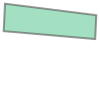

In [5]:
t = time()
lu_gta_gdf = gpd.read_file(gta_lu_path + 'GTAparcel16LU12.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_gta_gdf.shape[0], lu_gta_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_gta_gdf.columns)

cols = ['PIN', 'LANDUSE', 'geometry']

print("Taking the subset with columns\n:", cols)

lu_gta_gdf = lu_gta_gdf[cols]

print("\n-- New column names:\n", lu_gta_gdf.columns)

# lu_gta_gdf.plot(); # plotting the whole GeoDataFrame can take a very long time
lu_gta_gdf.iloc[0].geometry

----- GeoDataFrame loaded
in 14.51 seconds (0.24 minutes)
with 174,729 rows
and 13 columns
-- Column names:
 Index(['FID_1', 'PIN', 'SHAPE_Area', 'OBJECTID', 'FRONTAGE', 'DEPTH',
       'PROP_CODE', 'SITE_AREA', 'PIN_1', 'ID', 'Shape_Le_1', 'Shape_Ar_1',
       'geometry'],
      dtype='object')
Taking the subset with columns
: ['PIN', 'PROP_CODE', 'geometry']

-- New column names:
 Index(['PIN', 'PROP_CODE', 'geometry'], dtype='object')


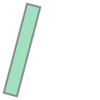

In [6]:
t = time()
lu_ham_gdf = gpd.read_file(ham_lu_path + 'Hparcel16LU10.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_ham_gdf.shape[0], lu_ham_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_ham_gdf.columns)

cols = ['PIN', 'PROP_CODE', 'geometry']

print("Taking the subset with columns\n:", cols)

lu_ham_gdf = lu_ham_gdf[cols]

print("\n-- New column names:\n", lu_ham_gdf.columns)

# lu_gta_gdf.plot(); # plotting the whole GeoDataFrame can take a very long time
lu_ham_gdf.iloc[0].geometry

## Save parcel centroids geometry as column 'pin_ctr'

In [23]:
lu_gta_gdf['pin_ctr_xy'] = lu_gta_gdf['geometry'].centroid.x.astype('str') + \
    '_' + lu_gta_gdf['geometry'].centroid.y.astype('str')
lu_ham_gdf['pin_ctr_xy'] = lu_ham_gdf['geometry'].centroid.x.astype('str') + \
    '_' + lu_ham_gdf['geometry'].centroid.y.astype('str')
print("Parcel cetroids were saved to column 'pin_ctr_xy'.")

Parcel cetroids were saved to column 'pin_ctr_xy'.


In [24]:
len(lu_gta_gdf)

1490138

In [25]:
lu_gta_gdf['PIN'].nunique()

1490138

In [26]:
lu_gta_gdf['pin_ctr_xy'].nunique()

1490138

In [27]:
len(lu_ham_gdf)

174729

In [28]:
lu_ham_gdf['PIN'].nunique()

174729

In [29]:
lu_ham_gdf['pin_ctr_xy'].nunique()

174729

# All records have unique PINs and coordinates
# No modification is needed
Land use dataset is left unmodified, every PIN corresponds to a unique coordinate pair and can be used as a **_primary key_**.